In [1]:
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import distance 
import nltk
import pandas as pd

import re

### Alibaba Submission to the WMT18 Parallel Corpus Filtering Task
https://www.statmt.org/wmt18/pdf/WMT110.pdf

In [2]:
lines_read = 1000000
lines = []
# words = {}
with open("../dataset/data", "r") as f:
    for i in range(lines_read):
        if i % 1000 == 0:
            print(i)
        line = f.readline()
        line = line.strip()
        en, de, hu = line.split('\t')
        lines.append([en, de])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [3]:
corpus = pd.DataFrame(lines)

In [13]:
samples = corpus.sample(n=1000, random_state=0)

In [14]:
def ratio_filter(en_tokenize, de_tokenize):
    '''
    Провремя отношение количества токенов в dest и src
    '''
    ratio = len(en_tokenize) / len(de_tokenize)
    min_ratio = 0.4
    max_ratio = 2.5
    is_correct_ratio = min_ratio <= ratio <= max_ratio
    return is_correct_ratio


def compare_edit_distance(en, de):
    '''
    Edit distance между строками должен быть больше минимального порога
    Иначе считаем строки слишком похожими
    '''
    dist = distance.edit_distance(en, de)
    # filter out long texts with small dist_ratio
    dist_ratio = dist / ((len(en) + len(de))/2)
    correct_distance = dist >= 2 and dist_ratio >= 0.1
    return correct_distance

def check_tokens_count(en_tokenize, de_tokenize):
    '''
    Отсекаем слишком короткие строки
    '''

    tokens_count = len(en_tokenize)
    min_length = 3
    max_length = 80
    is_correct_length = min_length <= tokens_count < max_length
    return is_correct_length

def get_valid_tokens_count(tokens, pattern):
    valid_tokens = 0
    for word in tokens:
        correct = re.fullmatch(pattern, word.lower()) is not None
        if correct:
            valid_tokens += 1
    return valid_tokens

def are_correct_letters(en_tokenize, de_tokenize):
    '''
    Проверяем, что в тексте на анлглийском нет слишком большого количества слов
    с неанглийскими буквами
    '''

    #print (en_tokenize, de_tokenize)
    en_valid_tokens = get_valid_tokens_count(en_tokenize, "[a-z\-\.]+")
    min_tokens_count = 0.2

    if en_valid_tokens / len(en_tokenize) <= min_tokens_count:
        return False

    de_valid_tokens = get_valid_tokens_count(de_tokenize, "[a-zßüöä\-\.]+")
    if de_valid_tokens / len(de_tokenize) <= min_tokens_count:
        return False

    return True


In [61]:
def united_filter(row):
    en = row[0]
    en_tokenize = word_tokenize(en)
    de = row[1]
    de_tokenize = word_tokenize(de)
    
    flag1 = ratio_filter(en_tokenize, de_tokenize)
    flag2 = compare_edit_distance(en, de)
    flag3 = check_tokens_count(en_tokenize, de_tokenize)
    flag4 = are_correct_letters(en_tokenize, de_tokenize)
    result_flag = flag1 and flag2 and flag3 and flag4
    return (en, de, result_flag)


In [ ]:
samples['is_correct'] = samples.apply(united_filter, axis=1)

In [75]:
samples.columns = ["en", "de", "is_correct"]

### Данные после обработки 

In [76]:
samples

,en,de,is_correct
157105,"Ein dunkler , Fast bl?ulich grau suede die obe...",Beide Teams fertig mit Gold Hosen und Helme. B...,True
374554,gest.: 8 SEP 1988,gest.: 7 JUN 1777,True
688694,http://www.navy.mil/management/photodb/photos/...,http://forum-marinearchiv.de/coppermine/displa...,False
265381,Search Hotel luxury Santa Margherita Di Pula,Suche Luxushotels Santa Margherita Di Pula,True
955415,/uploads/pics/Stuartchildrens_01.jpg,http://www.zillertalarena.com/de/wald-koenigsl...,False
4280,January 3348,Dezember 5796,False
514674,ðAosterkartenausstellung.at/osterkarten/galler...,ðAosterkartenausstellung.at/osterkarten/galler...,False
800352,"In message &lt;<a href=""mailto:87r70dldb9.fsf&...",&gt; &gt; Das klappt nur Ã¼ber die Privatinsol...,True
94727,March 4168,Mai 3544,False
753889,never gone to &gt; collections.,"&gt; Schwerbehindertenschein hat und wenn ja, ...",True


## Делаем замеры для многопроцессной обработки

In [21]:
from multiprocessing import Pool, TimeoutError

#### 4 processes, 1000 samples

In [50]:
%%timeit
pool = Pool(processes=4)
jobs = []
for i in range(1000):
    en = samples.iloc[i][0]
    de  = samples.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()
# for job in jobs:
#     print (job.get())

26.2 s ± 6.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 8 processes, 1000 samples

In [51]:
%%timeit
pool = Pool(processes=8)
jobs = []
for i in range(1000):
    en = samples.iloc[i][0]
    de  = samples.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

17.8 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 4 processes, 100 samples

In [52]:
%%timeit
pool = Pool(processes=4)
jobs = []
for i in range(100):
    en = samples.iloc[i][0]
    de  = samples.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

3.12 s ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 8 processes, 100 samples

In [53]:
%%timeit
pool = Pool(processes=8)
jobs = []
for i in range(100):
    en = samples.iloc[i][0]
    de  = samples.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

3.23 s ± 82.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 4 processes, 5000 samples

In [55]:
%%timeit
pool = Pool(processes=4)
jobs = []
for i in range(5000):
    en = corpus.iloc[i][0]
    de  = corpus.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

21.8 s ± 546 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 8 processes, 5000 samples

In [63]:
%%timeit
pool = Pool(processes=8)
jobs = []
for i in range(5000):
    en = corpus.iloc[i][0]
    de  = corpus.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

17.6 s ± 707 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 8 processes, 10000 samples

In [68]:
%%timeit
pool = Pool(processes=8)
jobs = []
for i in range(10000):
    en = corpus.iloc[i][0]
    de  = corpus.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

24 s ± 495 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 8 processes, 50000 samples

In [70]:
%%timeit
pool = Pool(processes=8)
jobs = []
for i in range(50000):
    en = corpus.iloc[i][0]
    de  = corpus.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()

1min 18s ± 907 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


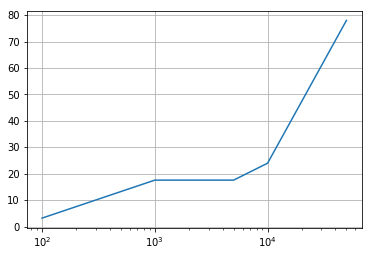

In [73]:
count = [100, 1000, 5000, 10000, 50000]
time = [3.23, 17.6, 17.6, 24, 60 + 18]
import matplotlib.pyplot as plt
%matplotlib inline
plt.grid(True)
plt.xscale("log")
plt.plot(count, time, )

In [64]:
pool = Pool(processes=8)
jobs = []
for i in range(10000):
    en = corpus.iloc[i][0]
    de  = corpus.iloc[i][1]
    row = (en, de,)
    jobs.append(pool.apply_async(united_filter, kwds = { "row" : row}))
pool.close()
pool.join()
for job in jobs:
    print(job.get())

('Home', 'Startseite', False)
('FI', 'FI', False)
('EN', 'EN', False)
('DE', 'DE', False)
('Products', 'Produkte', False)
('Company', 'Unternehmen', False)
('Contacts', 'Kontakt', False)
('The KARI EL22 electrode switch is designed for the control of conductive liquids.', 'Der Elektrodenschalter KARI EL22 dient zur Füllstandserfassung und -regelung von elektrisch leitfähigen Flüssigkeiten.', True)
('Read more', 'Mehr lesen', False)
('The renowned KARI float switch is a control device for magnetic valves. It is also an alarm device that alerts the user at specified surface levels.', 'Bei dem KARI-Schwimmerschalter handelt es sich um ein ausgesprochen gefragtes Produkt, das für die Steuerung von Magnetventilen und für den Grenzstandalarm konzipiert wurde.', True)
('KARI Exi relay makes the float switch suitable for potentially explosive atmospheres (ATEX).', 'Das Relais KARI Exi ermöglicht den Einsatz des Schwimmerschalters in explosionsgefährdeten Bereichen.', True)
('Devices for surfac

('May 4206', 'Mai 3434', False)
('June 4206', 'Juni 3434', False)
('< 3733 SepOctNovDec 3734 JanFebMarAprMay >', '< 2218 MäAprMaiJunJulAugSepOktNov >', True)
('November 3733', 'Mai 2218', False)
('December 3733', 'Juni 2218', False)
('< 3287 MayJunJulAugSepOctNovDec 3288 Jan >', '< 4715 OktNovDez 4716 JanFebMäAprMaiJun >', True)
('July 3287', 'Dezember 4715', False)
('August 3287', 'Januar 4716', False)
('< 4434 MayJunJulAugSepOctNovDec 4435 Jan >', '< 2341 AugSepOktNovDez 2342 JanFebMäApr >', True)
('July 4434', 'Oktober 2341', False)
('August 4434', 'November 2341', False)
('< 3354 MarAprMayJunJulAugSepOctNov >', '< 3977 SepOktNovDez 3978 JanFebMäAprMai >', True)
('May 3354', 'November 3977', False)
('June 3354', 'Dezember 3977', False)
('< 4134 AprMayJunJulAugSepOctNovDec >', '< 2136 Dez 2137 JanFebMäAprMaiJunJulAug >', True)
('June 4134', 'Februar 2137', False)
('July 4134', 'März 2137', False)
('< 2018 NovDec 2019 JanFebMarAprMayJunJul >', '< 4124 AugSepOktNovDez 4125 JanFebMäApr 

('February 5052', 'Oktober 6060', False)
('< 3639 JulAugSepOctNovDec 3640 JanFebMar >', '< 4791 NovDez 4792 JanFebMäAprMaiJunJul >', True)
('September 3639', 'Januar 4792', False)
('October 3639', 'Februar 4792', False)
('< 3463 OctNovDec 3464 JanFebMarAprMayJun >', '< 4566 OktNovDez 4567 JanFebMäAprMaiJun >', True)
('December 3463', 'Dezember 4566', False)
('January 3464', 'Januar 4567', False)
('< 4814 FebMarAprMayJunJulAugSepOct >', '< 3965 AugSepOktNovDez 3966 JanFebMäApr >', True)
('April 4814', 'Oktober 3965', False)
('May 4814', 'November 3965', False)
('< 2243 MayJunJulAugSepOctNovDec 2244 Jan >', '< 2672 FebMäAprMaiJunJulAugSepOkt >', True)
('July 2243', 'April 2672', False)
('August 2243', 'Mai 2672', False)
('< 4256 OctNovDec 4257 JanFebMarAprMayJun >', '< 2810 MaiJunJulAugSepOktNovDez 2811 Jan >', True)
('December 4256', 'Juli 2810', False)
('January 4257', 'August 2810', False)
('< 5847 SepOctNovDec 5848 JanFebMarAprMay >', '< 4473 OktNovDez 4474 JanFebMäAprMaiJun >', True

('April 2573', 'August 2536', False)
('< 5779 SepOctNovDec 5780 JanFebMarAprMay >', '< 5359 MaiJunJulAugSepOktNovDez 5360 Jan >', True)
('November 5779', 'Juli 5359', False)
('December 5779', 'August 5359', False)
('< 4014 JunJulAugSepOctNovDec 4015 JanFeb >', '< 4938 JulAugSepOktNovDez 4939 JanFebMä >', True)
('August 4014', 'September 4938', False)
('September 4014', 'Oktober 4938', False)
('< 2673 Dec 2674 JanFebMarAprMayJunJulAug >', '< 5358 JanFebMäAprMaiJunJulAugSep >', True)
('February 2674', 'März 5358', False)
('March 2674', 'April 5358', False)
('< 4657 Dec 4658 JanFebMarAprMayJunJulAug >', '< 5652 JunJulAugSepOktNovDez 5653 JanFeb >', True)
('February 4658', 'August 5652', False)
('March 4658', 'September 5652', False)
('< 3063 JulAugSepOctNovDec 3064 JanFebMar >', '< 3075 Dez 3076 JanFebMäAprMaiJunJulAug >', True)
('September 3063', 'Februar 3076', False)
('October 3063', 'März 3076', False)
('< 2513 OctNovDec 2514 JanFebMarAprMayJun >', '< 5507 NovDez 5508 JanFebMäAprMaiJu

('November 4074', 'Mai 3632', False)
('December 4074', 'Juni 3632', False)
('< 3751 FebMarAprMayJunJulAugSepOct >', '< 4877 MaiJunJulAugSepOktNovDez 4878 Jan >', True)
('April 3751', 'Juli 4877', False)
('May 3751', 'August 4877', False)
('< 2253 MayJunJulAugSepOctNovDec 2254 Jan >', '< 4920 JunJulAugSepOktNovDez 4921 JanFeb >', True)
('July 2253', 'August 4920', False)
('August 2253', 'September 4920', False)
('< 4026 MayJunJulAugSepOctNovDec 4027 Jan >', '< 5433 SepOktNovDez 5434 JanFebMäAprMai >', True)
('July 4026', 'November 5433', False)
('August 4026', 'Dezember 5433', False)
('< 3168 AugSepOctNovDec 3169 JanFebMarApr >', '< 4885 SepOktNovDez 4886 JanFebMäAprMai >', True)
('October 3168', 'November 4885', False)
('November 3168', 'Dezember 4885', False)
('< 5330 OctNovDec 5331 JanFebMarAprMayJun >', '< 4957 AugSepOktNovDez 4958 JanFebMäApr >', True)
('December 5330', 'Oktober 4957', False)
('January 5331', 'November 4957', False)
('< 3523 SepOctNovDec 3524 JanFebMarAprMay >', '<

('< 4263 OctNovDec 4264 JanFebMarAprMayJun >', '< 3940 NovDez 3941 JanFebMäAprMaiJunJul >', True)
('December 4263', 'Januar 3941', False)
('January 4264', 'Februar 3941', False)
('< 4081 JulAugSepOctNovDec 4082 JanFebMar >', '< 5717 JanFebMäAprMaiJunJulAugSep >', True)
('September 4081', 'März 5717', False)
('October 4081', 'April 5717', False)
('< 4417 FebMarAprMayJunJulAugSepOct >', '< 2802 FebMäAprMaiJunJulAugSepOkt >', True)
('April 4417', 'April 2802', False)
('May 4417', 'Mai 2802', False)
('< 4869 SepOctNovDec 4870 JanFebMarAprMay >', '< 5509 MäAprMaiJunJulAugSepOktNov >', True)
('November 4869', 'Mai 5509', False)
('December 4869', 'Juni 5509', False)
('< 3862 AugSepOctNovDec 3863 JanFebMarApr >', '< 4526 NovDez 4527 JanFebMäAprMaiJunJul >', True)
('October 3862', 'Januar 4527', False)
('November 3862', 'Februar 4527', False)
('< 3442 AprMayJunJulAugSepOctNovDec >', '< 3972 FebMäAprMaiJunJulAugSepOkt >', True)
('June 3442', 'April 3972', False)
('July 3442', 'Mai 3972', False)


('August 5581', 'Dezember 3825', False)
('< 2914 JunJulAugSepOctNovDec 2915 JanFeb >', '< 6077 NovDez 6078 JanFebMäAprMaiJunJul >', True)
('August 2914', 'Januar 6078', False)
('September 2914', 'Februar 6078', False)
('< 5766 JanFebMarAprMayJunJulAugSep >', '< 4563 SepOktNovDez 4564 JanFebMäAprMai >', True)
('March 5766', 'November 4563', False)
('April 5766', 'Dezember 4563', False)
('< 4759 AprMayJunJulAugSepOctNovDec >', '< 3092 MaiJunJulAugSepOktNovDez 3093 Jan >', True)
('June 4759', 'Juli 3092', False)
('July 4759', 'August 3092', False)
('< 3710 OctNovDec 3711 JanFebMarAprMayJun >', '< 2882 FebMäAprMaiJunJulAugSepOkt >', True)
('December 3710', 'April 2882', False)
('January 3711', 'Mai 2882', False)
('< 4668 SepOctNovDec 4669 JanFebMarAprMay >', '< 3439 NovDez 3440 JanFebMäAprMaiJunJul >', True)
('November 4668', 'Januar 3440', False)
('December 4668', 'Februar 3440', False)
('< 5273 JunJulAugSepOctNovDec 5274 JanFeb >', '< 2154 MaiJunJulAugSepOktNovDez 2155 Jan >', True)
('Au

('< 5118 FebMarAprMayJunJulAugSepOct >', '< 4872 AprMaiJunJulAugSepOktNovDez >', True)
('April 5118', 'Juni 4872', False)
('May 5118', 'Juli 4872', False)
('< 2909 AprMayJunJulAugSepOctNovDec >', '< 2984 JunJulAugSepOktNovDez 2985 JanFeb >', True)
('June 2909', 'August 2984', False)
('July 2909', 'September 2984', False)
('< 5603 MayJunJulAugSepOctNovDec 5604 Jan >', '< 3693 Dez 3694 JanFebMäAprMaiJunJulAug >', True)
('July 5603', 'Februar 3694', False)
('August 5603', 'März 3694', False)
('< 5763 MayJunJulAugSepOctNovDec 5764 Jan >', '< 4931 SepOktNovDez 4932 JanFebMäAprMai >', True)
('July 5763', 'November 4931', False)
('August 5763', 'Dezember 4931', False)
('< 6070 OctNovDec 6071 JanFebMarAprMayJun >', '< 2573 AprMaiJunJulAugSepOktNovDez >', True)
('December 6070', 'Juni 2573', False)
('January 6071', 'Juli 2573', False)
('< 2204 MarAprMayJunJulAugSepOctNov >', '< 5389 FebMäAprMaiJunJulAugSepOkt >', True)
('May 2204', 'April 5389', False)
('June 2204', 'Mai 5389', False)
('< 6063 

('October 5045', 'November 2883', False)
('< 3569 MayJunJulAugSepOctNovDec 3570 Jan >', '< 3385 AprMaiJunJulAugSepOktNovDez >', True)
('July 3569', 'Juni 3385', False)
('August 3569', 'Juli 3385', False)
('< 4994 MayJunJulAugSepOctNovDec 4995 Jan >', '< 4823 JulAugSepOktNovDez 4824 JanFebMä >', True)
('July 4994', 'September 4823', False)
('August 4994', 'Oktober 4823', False)
('< 2107 MarAprMayJunJulAugSepOctNov >', '< 3271 AugSepOktNovDez 3272 JanFebMäApr >', True)
('May 2107', 'Oktober 3271', False)
('June 2107', 'November 3271', False)
('< 2292 Dec 2293 JanFebMarAprMayJunJulAug >', '< 6061 OktNovDez 6062 JanFebMäAprMaiJun >', True)
('February 2293', 'Dezember 6061', False)
('March 2293', 'Januar 6062', False)
('< 4130 NovDec 4131 JanFebMarAprMayJunJul >', '< 4904 FebMäAprMaiJunJulAugSepOkt >', True)
('January 4131', 'April 4904', False)
('February 4131', 'Mai 4904', False)
('< 5709 MarAprMayJunJulAugSepOctNov >', '< 3567 AprMaiJunJulAugSepOktNovDez >', True)
('May 5709', 'Juni 3567